In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Statistical leraning I\\Final project\\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.shape

(12330, 18)

In [5]:
print(df.duplicated().sum())

125


In [6]:
df=df.drop_duplicates()
df.shape

(12205, 18)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
numerical_columns=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [10]:
# IQR function 
total_outliers=0
total_data_points = 0
def IQR(x):
    x = x.astype(np.float32)
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    bb = q1 - 1.5*(q3 - q1)
    ba = q3 + 1.5*(q3 - q1)
    outlier_indices = list(x.index[(x < bb) | (x > ba)])
    outlier_values = list(x[outlier_indices])
    return len(outlier_indices)
for i in numerical_columns:
    print(f'Number of IQR outliers {i}: {IQR(df[i])}')


for i in numerical_columns:
    outliers = IQR(df[i])
    total_outliers += outliers
    total_data_points += len(df[i])

total_outlier_percentage = (total_outliers / total_data_points) * 100

print(f'Total outlier percentage: {total_outlier_percentage:.2f}%')

Number of IQR outliers Administrative: 404
Number of IQR outliers Administrative_Duration: 1149
Number of IQR outliers Informational: 2631
Number of IQR outliers Informational_Duration: 2405
Number of IQR outliers ProductRelated: 1007
Number of IQR outliers ProductRelated_Duration: 951
Number of IQR outliers BounceRates: 1428
Number of IQR outliers ExitRates: 1325
Number of IQR outliers PageValues: 2730
Number of IQR outliers SpecialDay: 1249
Total outlier percentage: 12.52%


In [11]:
class AddNewVariables(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['Administrative_Duration_Page'] = X['Administrative_Duration']/df['Administrative']
        X['Informational_Duration_Page'] = X['Informational_Duration']/df['Informational']
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration']/df['ProductRelated']
        
        # division by zero becomes zero
        X['Administrative_Duration_Page'] = X['Administrative_Duration_Page'].fillna(0)
        X['Informational_Duration_Page'] = X['Informational_Duration_Page'].fillna(0)
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration_Page'].fillna(0)
     
        return X

In [12]:
class DropVariables(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.columns_to_drop)

In [13]:
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [15]:
pipe = Pipeline([
    ('add_new_vars', AddNewVariables()),
    ('drop_old_vars', DropVariables(columns_to_drop=['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']))  
])

In [16]:
pipe1 = clone(pipe)

In [17]:
X_train = pipe1.fit_transform(x_train.copy())
X_test = pipe1.fit_transform(x_test.copy())

In [18]:
y_train

2986    False
2699    False
926     False
4320    False
4857    False
        ...  
7380    False
7250     True
9176    False
3704    False
8023    False
Name: Revenue, Length: 8543, dtype: bool

In [19]:
X_train

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
2986,0.000000,0.005263,0.000000,0.0,May,2,2,2,6,Returning_Visitor,False,3.600000,9.5,24.372549
2699,0.018182,0.042424,0.000000,0.0,May,2,2,8,18,Returning_Visitor,False,0.000000,0.0,95.954545
926,0.037500,0.062500,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,0.000000,0.0,75.875000
4320,0.000000,0.030769,0.000000,0.0,May,1,1,1,1,Returning_Visitor,False,33.388889,0.0,17.111111
4857,0.015385,0.016667,0.000000,0.4,May,3,2,8,3,Returning_Visitor,False,27.500000,36.0,38.104419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.000000,0.026087,0.000000,0.0,Oct,2,5,1,3,Returning_Visitor,False,9.800000,0.0,49.522727
7250,0.000000,0.011111,78.569599,0.0,Sep,2,2,5,2,New_Visitor,False,0.000000,0.0,108.951852
9176,0.000000,0.040000,0.000000,0.0,Nov,3,2,3,13,Returning_Visitor,False,0.000000,0.0,10.200000
3704,0.009524,0.026984,0.000000,0.0,May,1,1,1,6,Returning_Visitor,False,0.000000,0.0,37.482143


In [20]:
numerical_columns=['Administrative_Duration_Page',
       'Informational_Duration_Page', 'ProductRelated_Duration_Page',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
X_train_numerical = X_train[numerical_columns]
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_train[numerical_columns] = X_train_numerical_scaled


X_test_numerical = X_test[numerical_columns]
scaler = StandardScaler()
X_test_numerical_scaled = scaler.fit_transform(X_test_numerical)
X_test[numerical_columns] = X_test_numerical_scaled

Text(0.5, 1.0, 'Correlation Heatmap')

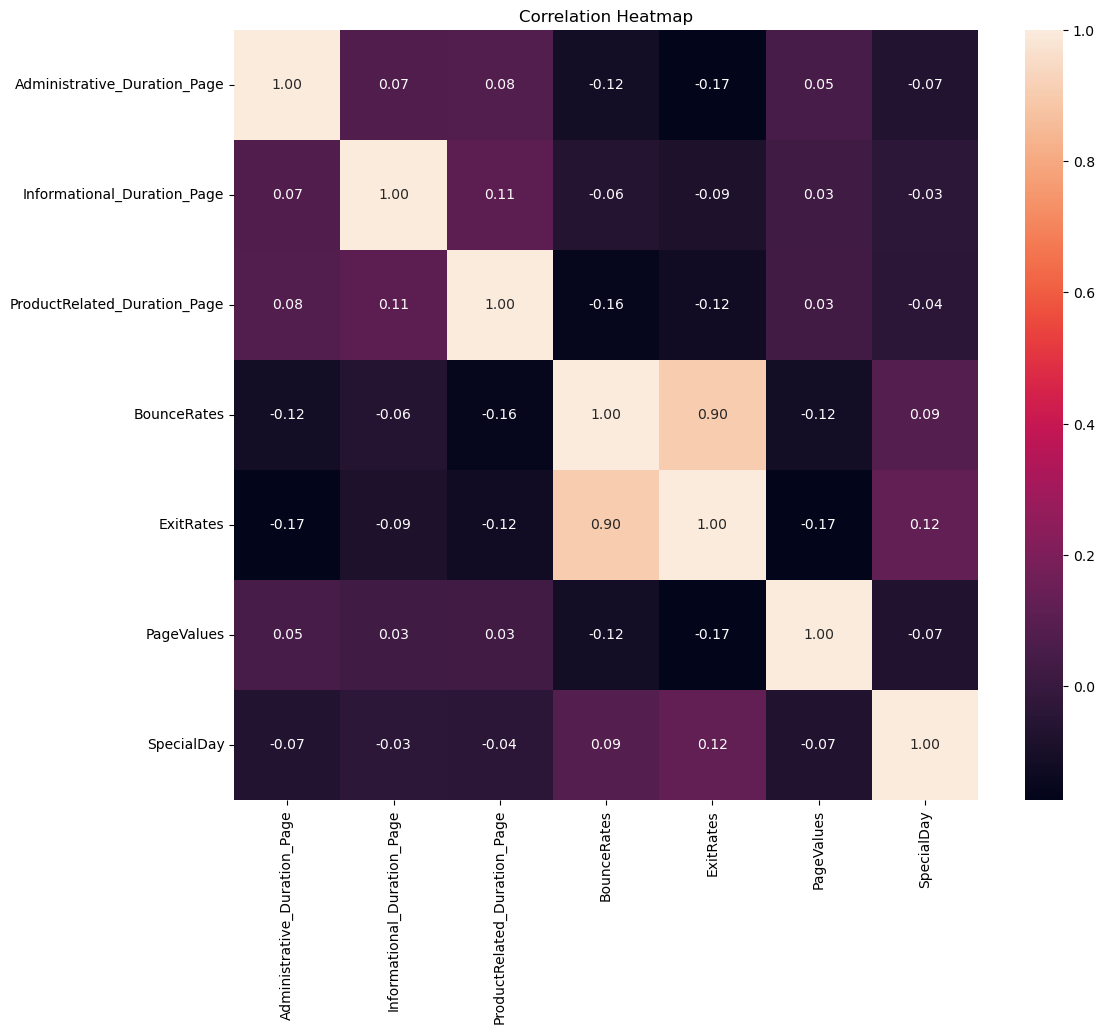

In [24]:
plt.figure(figsize=(12 , 10))
sns.heatmap(X_train[numerical_columns].corr(), linecolor="red", annot = True, fmt = '.2f')
plt.title('Correlation Heatmap')


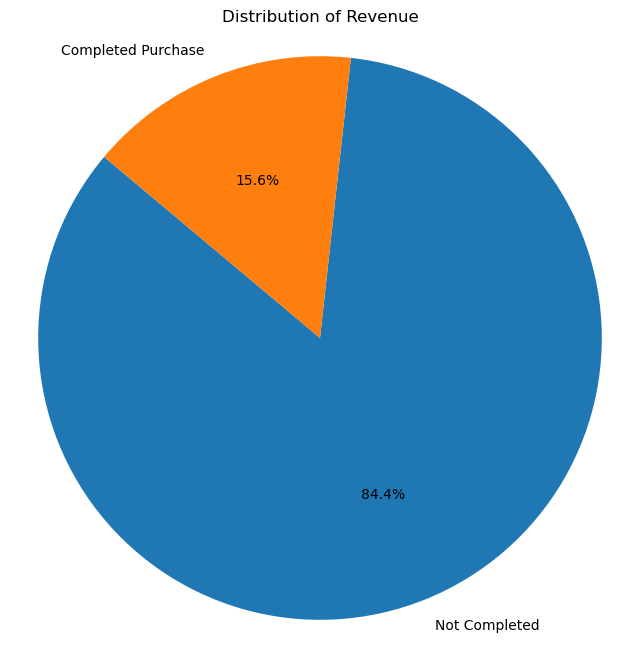



Percent share for each category:
Revenue
False    84.361466
True     15.638534
Name: proportion, dtype: float64


In [25]:
counts = y_train.value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Completed Purchase' if label else 'Not Completed' for label in counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Revenue')
plt.show()

print("\n")
print("Percent share for each category:")
print(counts)

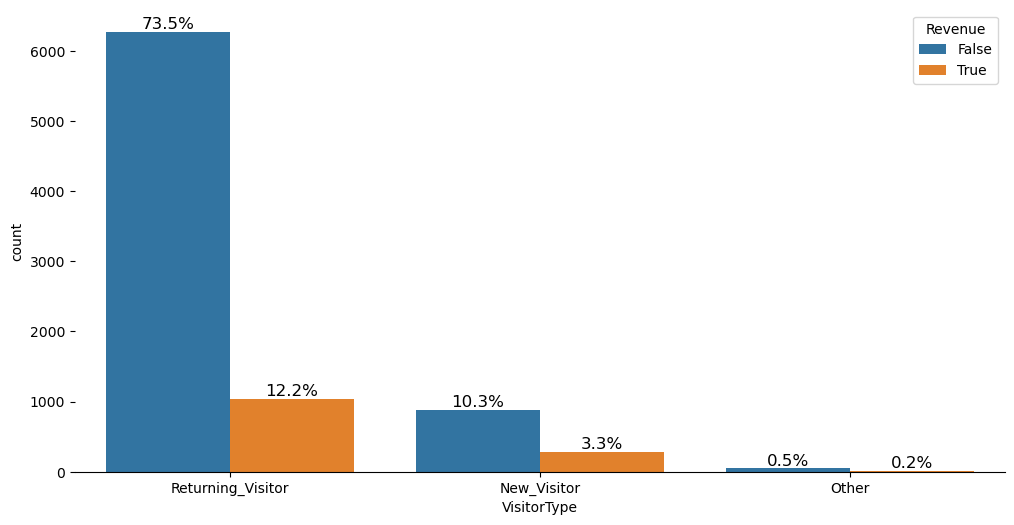

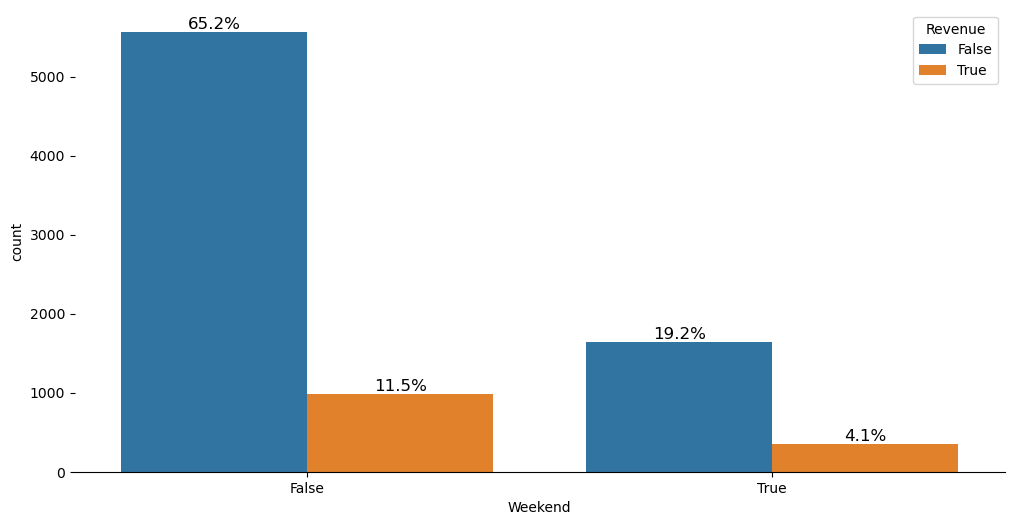

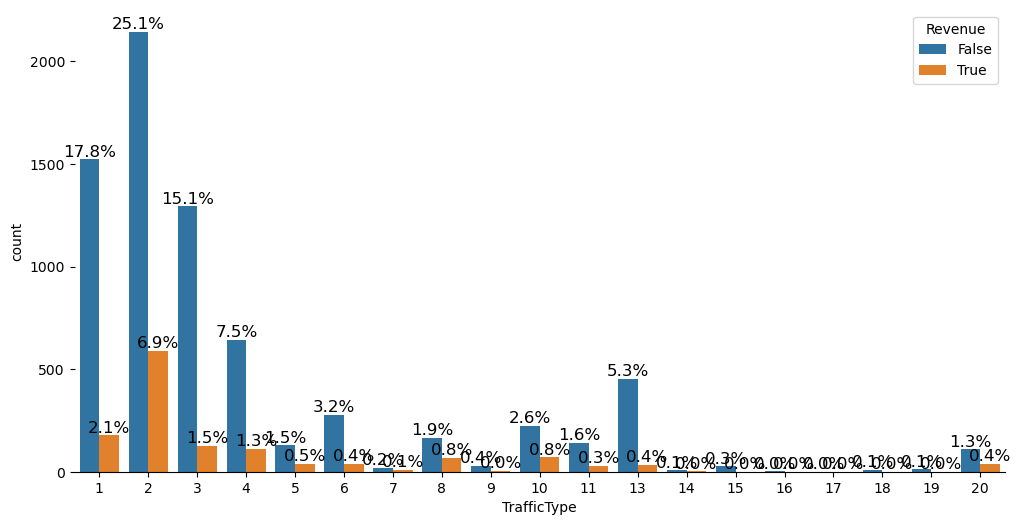

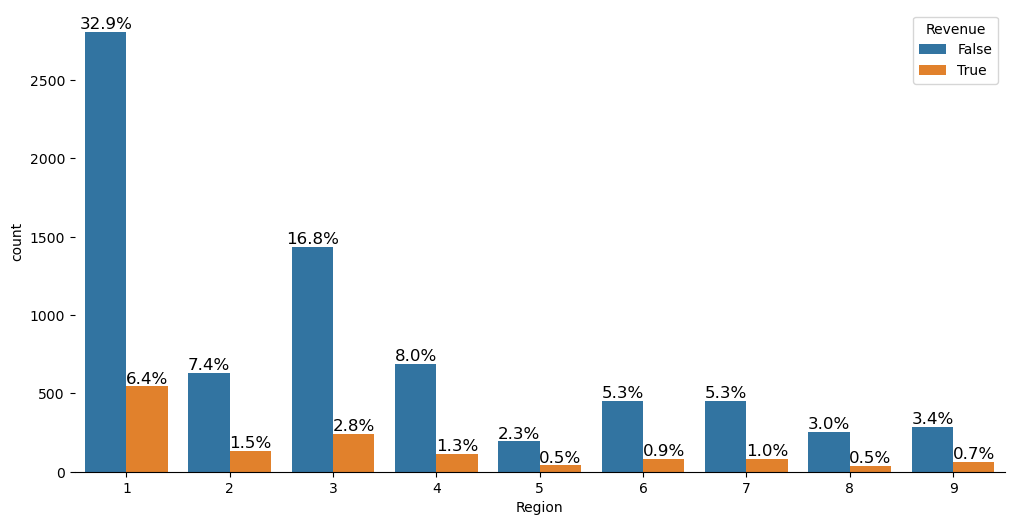

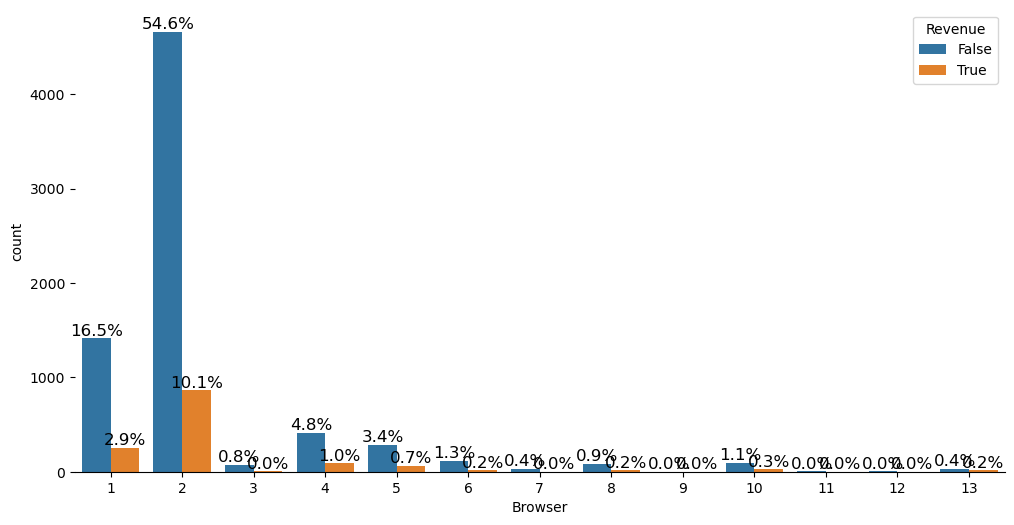

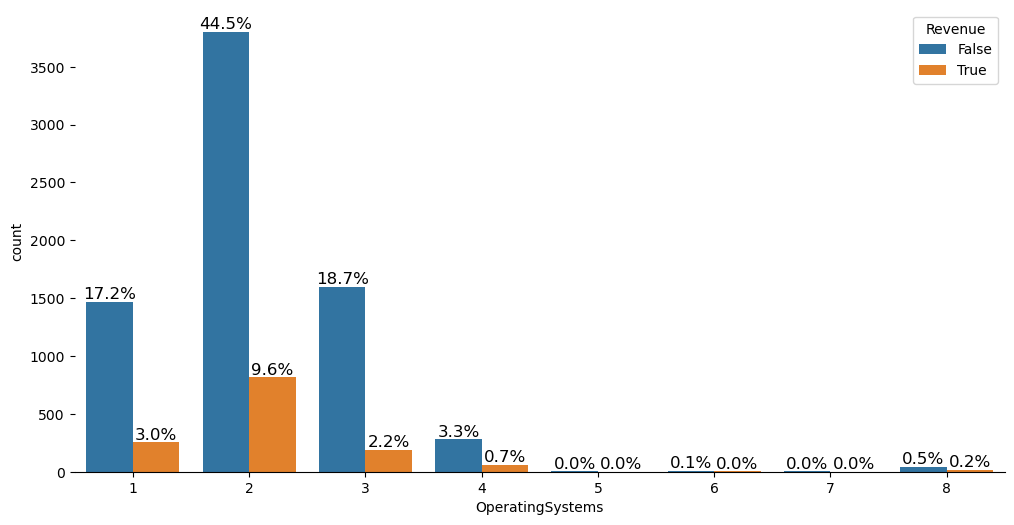

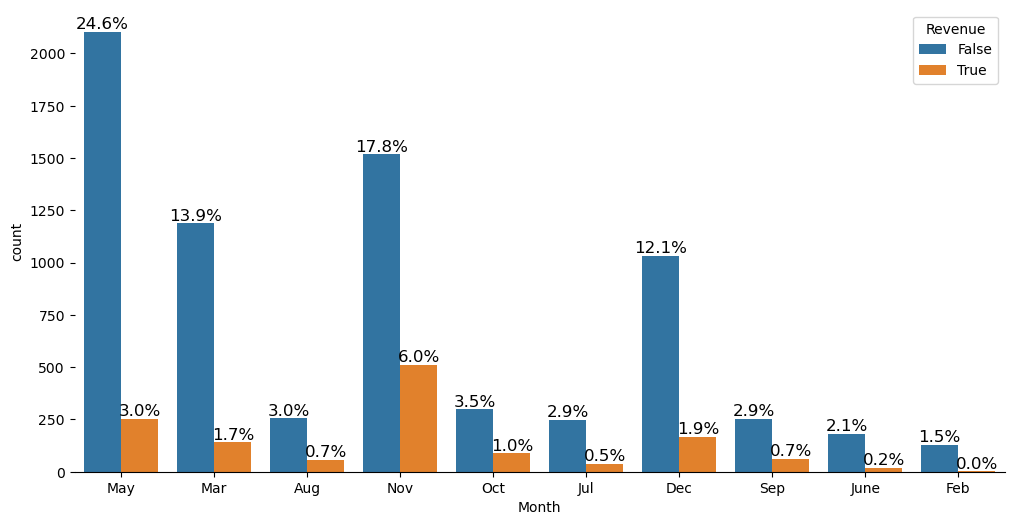

In [27]:
train_df = pd.concat([x_train, y_train], axis=1)
train_df
category=['VisitorType','Weekend','TrafficType','Region','Browser','OperatingSystems','Month']
for colum in category:
    def plot_data_percent(train_df, col, return_pct_share=True, hue=None, figsize=(12,6)):
        plt.figure(figsize=figsize)
        g = sns.countplot(data=train_df, x=col, hue=hue)
    
        total_count = len(train_df)
    
        for rect in g.patches:
            h = rect.get_height()
            w = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            pct_share = (h / total_count) * 100
            g.annotate(f"{pct_share:.1f}%", (x + w / 2, h), ha='center', va='bottom', fontsize=12)
            
        g.spines['top'].set_visible(False)
        g.spines['right'].set_visible(False)
        g.spines['left'].set_visible(False)
    
        plt.show()
    
        if return_pct_share:
            print("\n")
            print("Percent share for each category:")
            print(train_df[col].value_counts(normalize=True) * 100)
    plot_data_percent(train_df, col= colum, return_pct_share=False, hue='Revenue')

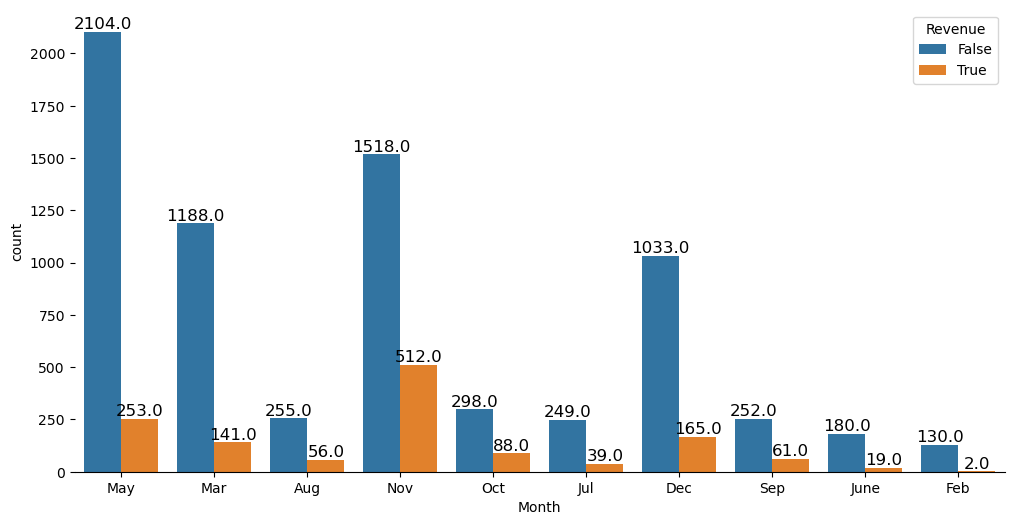

In [28]:
def plot_data_count(train_df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=train_df, x=col, hue=hue)
    total_counts = len(df)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
        if return_pct_share:
            pct_share = h / total_counts * 100
            g.annotate(f"{pct_share:.2f}%", (x+w/2, h), ha='center', va='top', fontsize=10)
            
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)
plot_data_count(train_df, col='Month', return_pct_share=False, hue='Revenue')

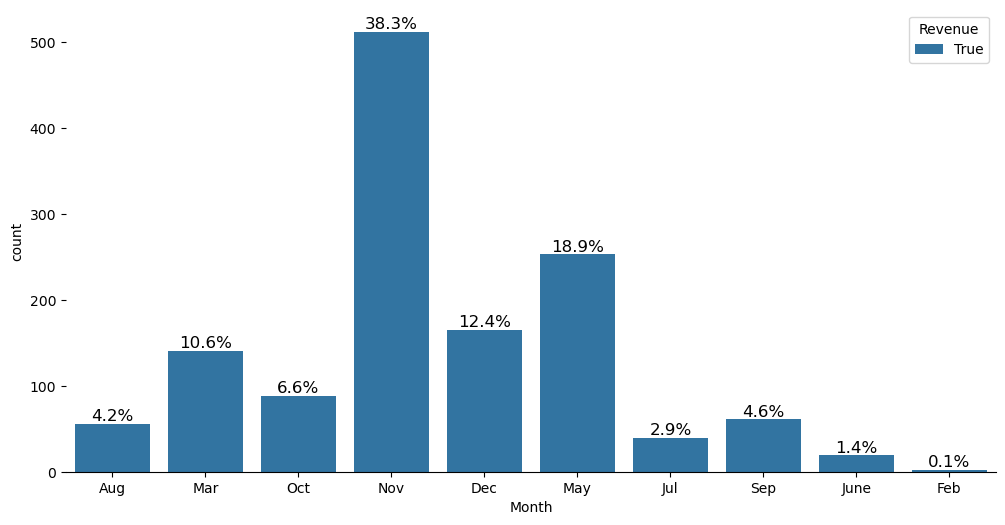

In [29]:
def plot_data_percent(train_df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    plt.figure(figsize=figsize)
    
    # Filter train_df to only include rows where 'Revenue' is True
    filtered_df = train_df[train_df['Revenue'] == True]
    
    g = sns.countplot(data=filtered_df, x=col, hue=hue)
    
    total_count = len(filtered_df)
    
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        pct_share = (h / total_count) * 100
        g.annotate(f"{pct_share:.1f}%", (x + w / 2, h), ha='center', va='bottom', fontsize=12)
        
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)

    plt.show()

    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(filtered_df[col].value_counts(normalize=True) * 100)

# Assuming you have already defined train_df
plot_data_percent(train_df, col='Month', return_pct_share=False, hue='Revenue')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


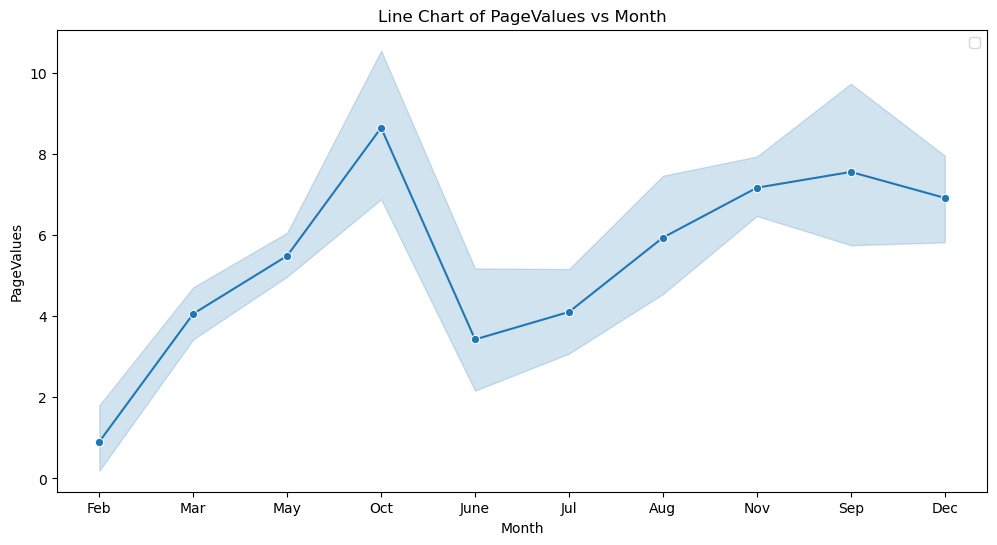

In [30]:
def plot_line_chart(df, x_col, y_col, hue=None, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, marker='o')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Line Chart of {y_col} vs {x_col}')
    plt.legend(title=hue)
    plt.show()

# Assuming you have already defined train_df
plot_line_chart(df, x_col='Month', y_col='PageValues')

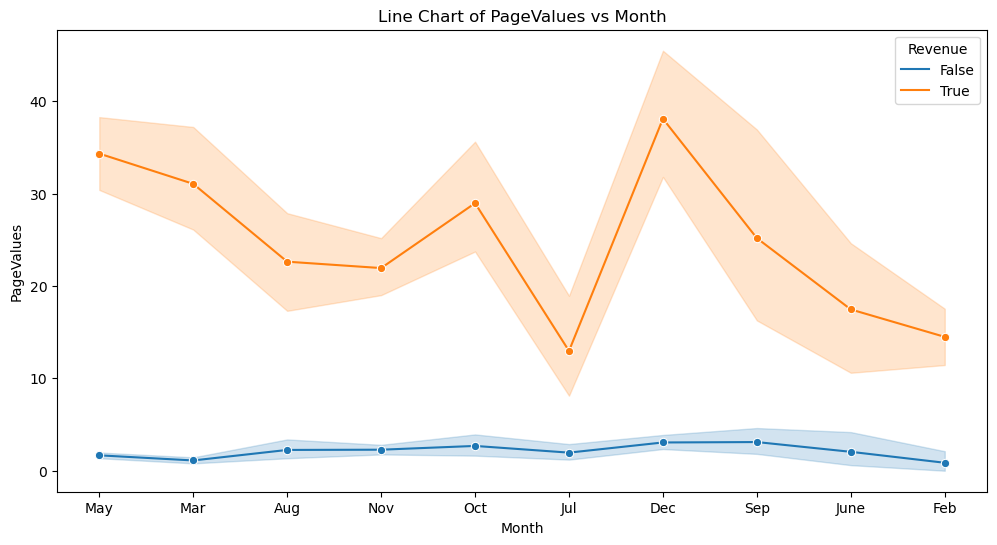

In [31]:
def plot_line_chart(train_df, x_col, y_col, hue=None, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(data=train_df, x=x_col, y=y_col, hue=hue, marker='o')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Line Chart of {y_col} vs {x_col}')
    plt.legend(title=hue)
    plt.show()

# Assuming you have already defined train_df
plot_line_chart(train_df, x_col='Month', y_col='PageValues', hue='Revenue')

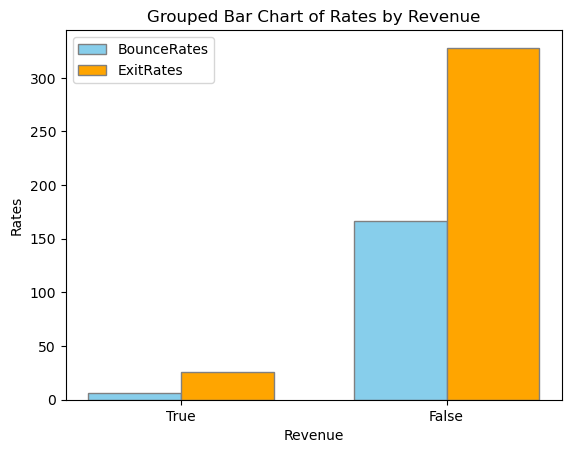

In [32]:
bounce_rates_true_sum = train_df[train_df['Revenue'] == True]['BounceRates'].sum()
exit_rates_true_sum = train_df[train_df['Revenue'] == True]['ExitRates'].sum()
bounce_rates_false_sum = train_df[train_df['Revenue'] == False]['BounceRates'].sum()
exit_rates_false_sum = train_df[train_df['Revenue'] == False]['ExitRates'].sum()
# Sample data
revenue_categories = ['True', 'False']
bounce_rates = [bounce_rates_true_sum,bounce_rates_false_sum ]
exit_rates = [exit_rates_true_sum,exit_rates_false_sum ]

# Define the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(revenue_categories))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, bounce_rates, color='skyblue', width=bar_width, edgecolor='grey', label='BounceRates')
plt.bar(r2, exit_rates, color='orange', width=bar_width, edgecolor='grey', label='ExitRates')

# Adding labels and title
plt.xlabel('Revenue')
plt.ylabel('Rates')
plt.title('Grouped Bar Chart of Rates by Revenue')
plt.xticks([r + bar_width/2 for r in range(len(revenue_categories))], revenue_categories)
plt.legend()

# Show plot
plt.show()

In [35]:
sum_admin_duration_revenue_true_may = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == 'May')]['Administrative_Duration'].sum()
sum_admin_duration_revenue_true_may

24020.04726084

In [36]:
sums_by_month = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of Administrative_Duration for the filtered DataFrame
    sum_admin_duration_revenue_true = filtered_df['Administrative_Duration'].sum()
    # Append the sum to the list
    sums_by_month.append((month, sum_admin_duration_revenue_true))

# Print the sums for each month
for month, total in sums_by_month:
    print(f"Sum of Administrative_Duration related to True revenue for {month}: {total}")

Sum of Administrative_Duration related to True revenue for May: 24020.04726084
Sum of Administrative_Duration related to True revenue for Mar: 19516.50288004
Sum of Administrative_Duration related to True revenue for Aug: 6719.9295083
Sum of Administrative_Duration related to True revenue for Nov: 64946.149545874
Sum of Administrative_Duration related to True revenue for Oct: 10242.210782080001
Sum of Administrative_Duration related to True revenue for Jul: 3147.1806814699994
Sum of Administrative_Duration related to True revenue for Dec: 19326.85845885
Sum of Administrative_Duration related to True revenue for Sep: 4427.63452377
Sum of Administrative_Duration related to True revenue for June: 2189.5833333329997
Sum of Administrative_Duration related to True revenue for Feb: 1066.666667


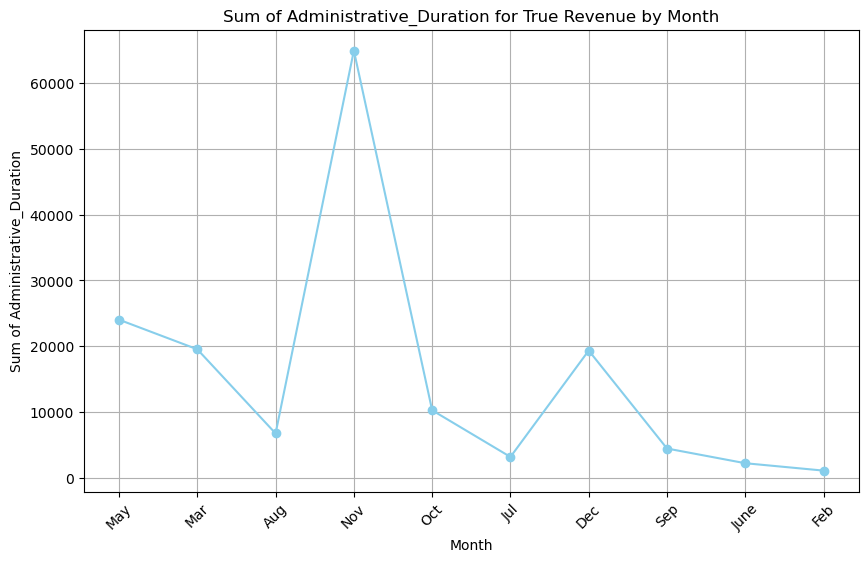

In [37]:
months = [month for month, _ in sums_by_month]
totals = [total for _, total in sums_by_month]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(months, totals, marker='o', color='skyblue', linestyle='-')
plt.title('Sum of Administrative_Duration for True Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Administrative_Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Sum of ProductRelated_Duration related to True revenue for May: 303309.0276515
Sum of ProductRelated_Duration related to True revenue for Mar: 220673.65070959998
Sum of ProductRelated_Duration related to True revenue for Aug: 69815.5037105
Sum of ProductRelated_Duration related to True revenue for Nov: 1420601.15499836
Sum of ProductRelated_Duration related to True revenue for Oct: 111177.58376745999
Sum of ProductRelated_Duration related to True revenue for Jul: 58781.92373730001
Sum of ProductRelated_Duration related to True revenue for Dec: 212071.38599176996
Sum of ProductRelated_Duration related to True revenue for Sep: 58285.0412151
Sum of ProductRelated_Duration related to True revenue for June: 18206.782008529997
Sum of ProductRelated_Duration related to True revenue for Feb: 2718.341667


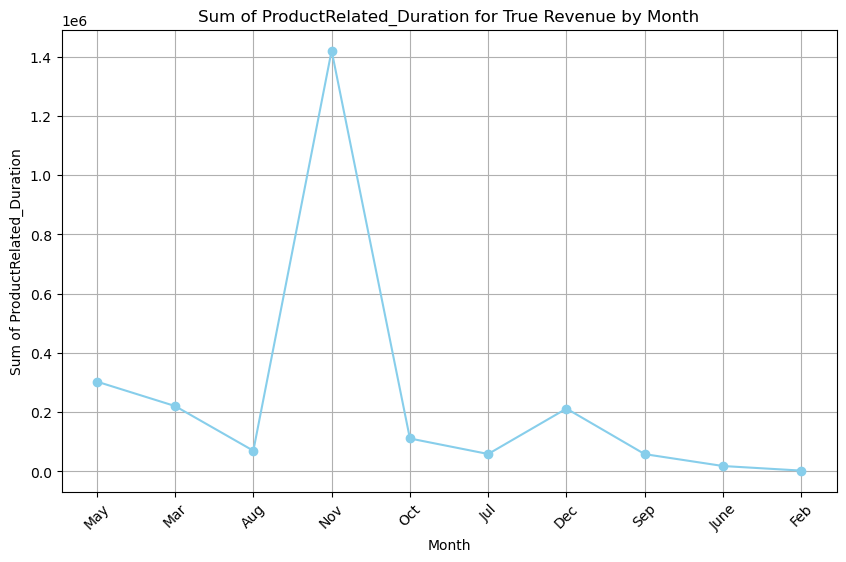

In [38]:
sums_by_month_product_related = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of ProductRelated_Duration for the filtered DataFrame
    sum_product_related_duration_revenue_true = filtered_df['ProductRelated_Duration'].sum()
    # Append the sum to the list
    sums_by_month_product_related.append((month, sum_product_related_duration_revenue_true))

# Print the sums for each month
for month, total in sums_by_month_product_related:
    print(f"Sum of ProductRelated_Duration related to True revenue for {month}: {total}")

# Extracting months and sums from the list of tuples
months_product_related = [month for month, _ in sums_by_month_product_related]
totals_product_related = [total for _, total in sums_by_month_product_related]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(months_product_related, totals_product_related, marker='o', color='skyblue', linestyle='-')
plt.title('Sum of ProductRelated_Duration for True Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Sum of ProductRelated_Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Sum of Informational_Duration related to True revenue for May: 9289.19999986
Sum of Informational_Duration related to True revenue for Mar: 11597.83421084
Sum of Informational_Duration related to True revenue for Aug: 2523.3
Sum of Informational_Duration related to True revenue for Nov: 36690.71212458
Sum of Informational_Duration related to True revenue for Oct: 6221.41428567
Sum of Informational_Duration related to True revenue for Jul: 2395.4000003700003
Sum of Informational_Duration related to True revenue for Dec: 6343.66666663
Sum of Informational_Duration related to True revenue for Sep: 1745.7333333
Sum of Informational_Duration related to True revenue for June: 349.4
Sum of Informational_Duration related to True revenue for Feb: 0.0


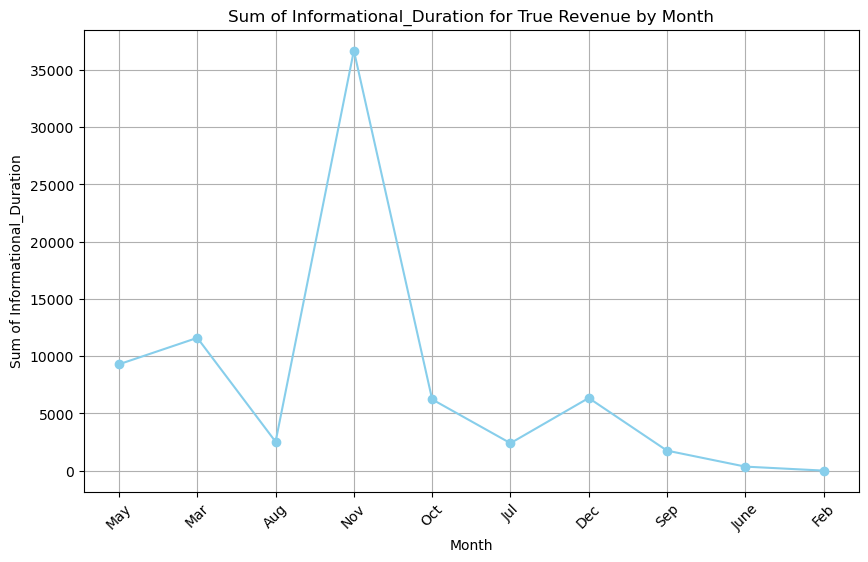

In [39]:
sums_by_month_informational = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of Informational_Duration for the filtered DataFrame
    sum_informational_duration_revenue_true = filtered_df['Informational_Duration'].sum()
    # Append the sum to the list
    sums_by_month_informational.append((month, sum_informational_duration_revenue_true))

# Print the sums for each month
for month, total in sums_by_month_informational:
    print(f"Sum of Informational_Duration related to True revenue for {month}: {total}")

# Extracting months and sums from the list of tuples
months_informational = [month for month, _ in sums_by_month_informational]
totals_informational = [total for _, total in sums_by_month_informational]

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(months_informational, totals_informational, marker='o', color='skyblue', linestyle='-')
plt.title('Sum of Informational_Duration for True Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Informational_Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

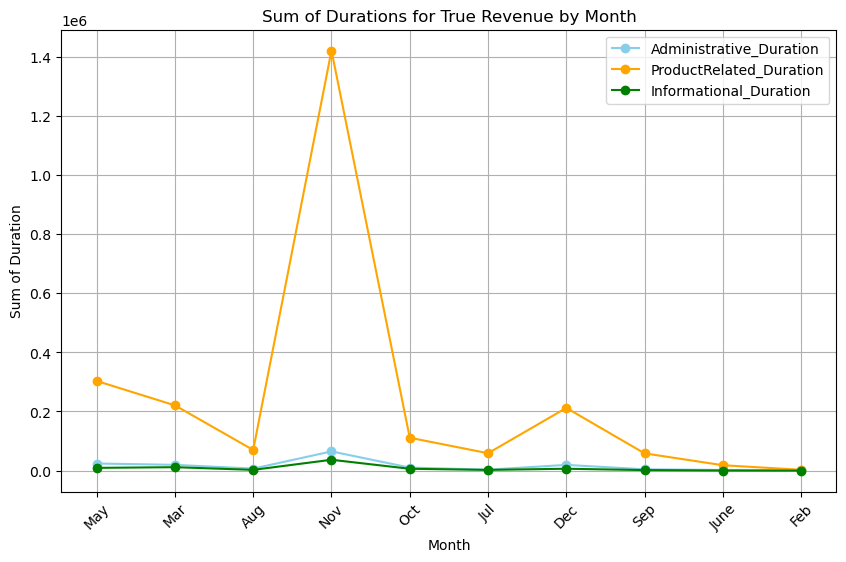

In [41]:
sums_by_month_administrative = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of Administrative_Duration for the filtered DataFrame
    sum_administrative_duration_revenue_true = filtered_df['Administrative_Duration'].sum()
    # Append the sum to the list
    sums_by_month_administrative.append((month, sum_administrative_duration_revenue_true))

# Extracting months and sums from the list of tuples for Administrative_Duration
months_administrative = [month for month, _ in sums_by_month_administrative]
totals_administrative = [total for _, total in sums_by_month_administrative]

# List to store the sums for each month for ProductRelated_Duration
sums_by_month_product_related = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of ProductRelated_Duration for the filtered DataFrame
    sum_product_related_duration_revenue_true = filtered_df['ProductRelated_Duration'].sum()
    # Append the sum to the list
    sums_by_month_product_related.append((month, sum_product_related_duration_revenue_true))

# Extracting months and sums from the list of tuples for ProductRelated_Duration
months_product_related = [month for month, _ in sums_by_month_product_related]
totals_product_related = [total for _, total in sums_by_month_product_related]

# List to store the sums for each month for Informational_Duration
sums_by_month_informational = []

# Iterate over all months
for month in train_df['Month'].unique():
    # Filter the DataFrame for True revenue and the current month
    filtered_df = train_df[(train_df['Revenue'] == True) & (train_df['Month'] == month)]
    # Calculate the sum of Informational_Duration for the filtered DataFrame
    sum_informational_duration_revenue_true = filtered_df['Informational_Duration'].sum()
    # Append the sum to the list
    sums_by_month_informational.append((month, sum_informational_duration_revenue_true))

# Extracting months and sums from the list of tuples for Informational_Duration
months_informational = [month for month, _ in sums_by_month_informational]
totals_informational = [total for _, total in sums_by_month_informational]

# Plotting the line charts for Administrative_Duration, ProductRelated_Duration, and Informational_Duration
plt.figure(figsize=(10, 6))

plt.plot(months_administrative, totals_administrative, marker='o', color='skyblue', linestyle='-', label='Administrative_Duration')
plt.plot(months_product_related, totals_product_related, marker='o', color='orange', linestyle='-', label='ProductRelated_Duration')
plt.plot(months_informational, totals_informational, marker='o', color='green', linestyle='-', label='Informational_Duration')

plt.title('Sum of Durations for True Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()